In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Generación de la matriz de cargas L, con distribución normal  de media b11' y varianza sigma_bI
def generateL(p,k,b,sigma_b):
    return np.random.normal(0,1,(p,k))*np.sqrt(sigma_b)+b

In [3]:
#Generación de la matriz de factores F, con distribuión normal de media 0 y matriz de covarianzas sigma_fI
def generateF(n,sigma_b,k):
    return np.random.normal(0,1,(n,k))*np.sqrt(sigma_f)

In [4]:
#Generación de la matriz de ruido idiosincrático E, con distribucion normal de media 0 y matriz de covarianzas sigma_eI
def generaterror(p,n,sigma_e):
    return np.random.normal(0,1,(p,n))*np.sqrt(sigma_e)

In [5]:
#Función que simula una matriz de retornos R, bajo los supuestos del modelo de Brown
def simulateR(k,b,sigma_b,sigma_e,i,n):
    L = generateL(i,k,b,sigma_b)
    F = generateF(n,sigma_b,k)
    error = generaterror(i,n,sigma_e)
    return np.dot(L,np.transpose(F))+error

In [6]:
#Inicializamos los parámetros del modelo
k = 4
b = 1
sigma_b = .01
sigma_f = .000158
sigma_e = .0045
n = 80

In [7]:
#La matriz prom contendra para cada valor de p, los valores medios de los 5 eigenvalores más grandes
prom = np.zeros(151*5).reshape(151,5)
#La matriz interq contendra para cada valor de p, los valores en los cuantiles intermedios del eigenvalor experimental más grande
interq = np.zeros(151*3).reshape(151,3)
#En el vector veceigen almacenamos el eigenvalor más grande obtenido en cada uno de los 100 repeticiones
veceigen =np.zeros(100)
#Para cada valor de p
for i in range(50,201): 
    #Realizamos 100 experimentos donde
    for j in range(100):
        R = simulateR(k,b,sigma_b,sigma_e,i,n)#Simulamos una matriz de retornos
        Cov = (1/n)*np.dot(R,np.transpose(R))#Calculamos su covarianza
        eigenvalues , eigenvectors = np.linalg.eigh(Cov)#Obtenemos los eigenvalores de esa matriz
        eigen = np.flip(eigenvalues)[0:5]#Los ordenamos de mayor a menor
        #Vamos sumando los eigenvalores más grandes, los segundos más grandes, etc
        prom[i-50,0] = prom[i-50,0] + eigen[0]
        prom[i-50,1] = prom[i-50,1] + eigen[1]
        prom[i-50,2] = prom[i-50,2] + eigen[2]
        prom[i-50,3] = prom[i-50,3] + eigen[3]
        prom[i-50,4] = prom[i-50,4] + eigen[4]
        veceigen[j] = eigen[0]#Almacenamos el eigenvalor más grande en veceigen
    #Calculamos los intercuantiles del eigenvalor experimental más grande
    interq[i-50,0] = np.percentile(veceigen,25)
    interq[i-50,1] = np.percentile(veceigen,50)
    interq[i-50,2] = np.percentile(veceigen,75)
    #Calculamos el valor promedio sobre los 100 experimentos del eigenvalor más grande y de los siguientes 4
    prom[i-50,0] = prom[i-50,0]/100
    prom[i-50,1] = prom[i-50,1]/100
    prom[i-50,2] = prom[i-50,2]/100
    prom[i-50,3] = prom[i-50,3]/100
    prom[i-50,4] = prom[i-50,4]/100

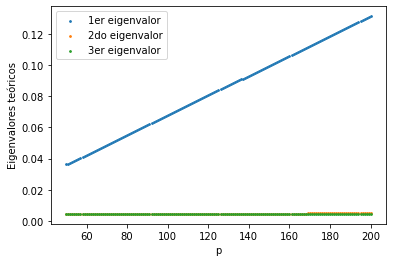

In [30]:
x = np.zeros(151)#Almacena los valores de p
y1 = np.zeros(151)#Almacena los valores del eigenvalor teórico más grande
y2 = np.zeros(151)# Almacena los valores teóricos de los eigenvalores 2 al k
y3 = np.zeros(151)# Almacena los valores teóricos de los eigenvalores k+1 al p
#Calculamos los eigenvalores de forma teórica de acuerdo al modelo de Brown
for i in range(50,201):
    x[i-50] = i
    y1[i-50] = i*sigma_f*(sigma_b+k*b*b)+sigma_e
    y2[i-50] = i*sigma_f*sigma_b+sigma_e
    y3[i-50] = sigma_e
#Graficamos los resultados teóricos
plt.scatter(x,y1,s=3,label="1er eigenvalor")
plt.scatter(x,y2,s=3,label="2do eigenvalor")
plt.scatter(x,y3,s=3,label="3er eigenvalor")
plt.xlabel("p")
plt.ylabel("Eigenvalores teóricos")
plt.legend(loc="upper left")

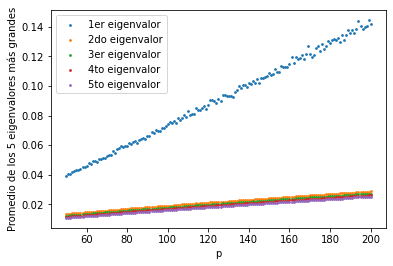

In [29]:
#Graficamos la gráfica con los 5 eigenvalores experimentales más grandes para cada valor de p
plt.scatter(x,prom[:,0],s=3,label="1er eigenvalor")
plt.scatter(x,prom[:,1],s=3,label="2do eigenvalor")
plt.scatter(x,prom[:,2],s=3,label="3er eigenvalor")
plt.scatter(x,prom[:,3],s=3,label="4to eigenvalor")
plt.scatter(x,prom[:,4],s=3,label="5to eigenvalor")
plt.xlabel("p")
plt.ylabel("Promedio de los 5 eigenvalores más grandes")
plt.legend(loc='upper left')

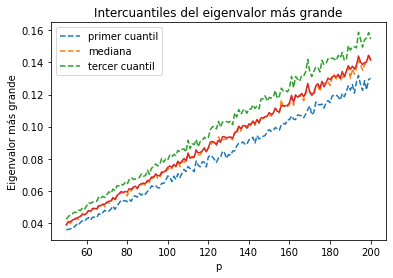

In [27]:
#Graficamos el eigenvalor experimental más grande junto a sus interquantiles 
plt.plot(x,interq[:,0],linestyle='--',label="primer cuantil")
plt.plot(x,interq[:,1],linestyle='--',label="mediana")
plt.plot(x,interq[:,2],linestyle='--',label="tercer cuantil")
plt.plot(x,prom[:,0])
plt.xlabel("p")
plt.ylabel("Eigenvalor más grande")
plt.title("Intercuantiles del eigenvalor más grande")
plt.legend(loc='upper left')
plt.show()

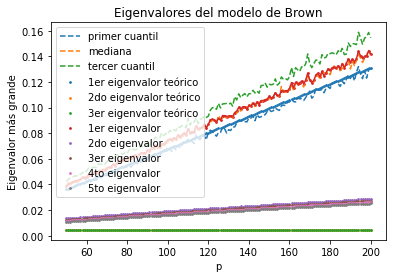

In [34]:
#Grafica que concentra todos los resultados anteriores
plt.scatter(x,y1,s=3,label="1er eigenvalor teórico")
plt.scatter(x,y2,s=3,label="2do eigenvalor teórico")
plt.scatter(x,y3,s=3,label="3er eigenvalor teórico")
plt.scatter(x,prom[:,0],s=3,label="1er eigenvalor")
plt.scatter(x,prom[:,1],s=3,label="2do eigenvalor")
plt.scatter(x,prom[:,2],s=3,label="3er eigenvalor")
plt.scatter(x,prom[:,3],s=3,label="4to eigenvalor")
plt.scatter(x,prom[:,4],s=3,label="5to eigenvalor")
plt.plot(x,interq[:,0],linestyle='--',label="primer cuantil")
plt.plot(x,interq[:,1],linestyle='--',label="mediana")
plt.plot(x,interq[:,2],linestyle='--',label="tercer cuantil")
plt.plot(x,prom[:,0])
plt.xlabel("p")
plt.ylabel("Eigenvalor más grande")
plt.title("Eigenvalores del modelo de Brown")
plt.legend(loc='upper left')
plt.show()